In [1038]:
import pandas as pd
import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import random


from matplotlib.font_manager import FontManager
fm = FontManager()
mat_fonts = set(f.name for f in fm.ttflist)
# print(mat_fonts)

import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['DengXian']
plt.rcParams.update({'font.size': 16})

# Load pre-computed decile ACS data

The income level were computed by Metropolitian Statistics Areas (MSAs); thus, please do analysis based on MSA only, NOT county- or state-level.

In [1039]:
# Set the data directory first:
Data_dir = r'..\weekly_patterns_time_aggre_2018_2021_test'

MSA_decile_df = pd.read_csv(os.path.join(Data_dir, 'ACS_race_cbsa_income_2019_county_decile.csv')).fillna('').rename(columns={'mean_household_income_decile':'median_household_income_decile'})
MSA_decile_df['cbg_fips'] = MSA_decile_df['cbg_fips'].astype(str).str.zfill(12)
MSA_decile_df['county_fips'] = MSA_decile_df['cbg_fips'].astype(str).str[:5]
MSA_decile_df = MSA_decile_df[MSA_decile_df['median_household_income_decile'] != '']
MSA_decile_df

<ipython-input-1039-c8f2d68d5438>:4: DtypeWarning: Columns (19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  MSA_decile_df = pd.read_csv(os.path.join(Data_dir, 'ACS_race_cbsa_income_2019_county_decile.csv')).fillna('').rename(columns={'mean_household_income_decile':'median_household_income_decile'})


,OBJECTID,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,INTPTLAT,INTPTLON,Shape_Area,GEOID_Data,county_code,...,FIPS State Code,FIPS County Code,GEOID,total_household_income,total_households,mean_household_income,median_household_income,cbg_fips,median_household_income_decile,county_fips
0,28.0,1,105,687100,1,32.538810,-87.365211,3.630738e+08,15000US011056871001,1105,...,1,105,15000US011056871001,6279926.0,172.0,36511.197674,0,011056871001,0.0,01105
1,29.0,1,105,687000,2,32.613224,-87.269014,5.349134e+07,15000US011056870002,1105,...,1,105,15000US011056870002,13069842.0,399.0,32756.496241,23494,011056870002,0.0,01105
2,148.0,1,133,965501,2,34.241708,-87.141064,7.349666e+07,15000US011339655012,1133,...,1,133,15000US011339655012,21077303.0,445.0,47364.725843,43080,011339655012,2.0,01133
3,151.0,1,133,965503,2,34.063547,-87.167204,5.437721e+07,15000US011339655032,1133,...,1,133,15000US011339655032,25729831.5,383.0,67179.71671,52431,011339655032,7.0,01133
4,152.0,1,133,965502,2,34.026184,-87.208888,6.900445e+07,15000US011339655022,1133,...,1,133,15000US011339655022,48117211.0,665.0,72356.708271,54792,011339655022,8.0,01133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219211,194510.0,48,505,950400,4,26.844204,-99.242335,4.413523e+07,15000US485059504004,48505,...,48,505,15000US485059504004,35529660.0,699.0,50829.270386,43550,485059504004,4.0,48505
219212,194511.0,48,505,950400,3,27.014826,-99.118435,1.578653e+09,15000US485059504003,48505,...,48,505,15000US485059504003,39367266.0,595.0,66163.472269,0,485059504003,7.0,48505
219213,194512.0,48,505,950302,3,26.902485,-99.249957,1.016389e+07,15000US485059503023,48505,...,48,505,15000US485059503023,37977220.5,703.0,54021.650782,33914,485059503023,6.0,48505
219214,194513.0,48,505,950301,1,26.919492,-99.260633,1.453950e+06,15000US485059503011,48505,...,48,505,15000US485059503011,35877132.5,911.0,39382.143249,29855,485059503011,2.0,48505


## Load POI-time aggregated data 

You can use any way to select the time-aggregation CSV files. 

The time-aggregation CSV files are stored in state_code directories: `45\51011_top_category_dwell_time_2021-12-27_To_2022-01-03.csv`.

The following is an example: loading the POI-time aggregated data of three MSAs in South Carolina.

Variable need to set: 

`POI_level`: top or sub

`start_time`: YYYY-MM, e.g., 2021-01

`end_time`: YYY-MM, e.g., 2021-02

In [1040]:
# Get the MSA names of SC 
MSA_list = MSA_decile_df[MSA_decile_df['CBSA Title'].str.contains('CA', case=True)]['CBSA Title'].unique() 
MSA_list

array(['Bakersfield, CA', 'Chico, CA', 'Clearlake, CA',
       'Crescent City, CA', 'El Centro, CA', 'Eureka-Arcata, CA',
       'Fresno, CA', 'Hanford-Corcoran, CA',
       'Los Angeles-Long Beach-Anaheim, CA', 'Madera, CA', 'Merced, CA',
       'Modesto, CA', 'Napa, CA', 'Oxnard-Thousand Oaks-Ventura, CA',
       'Red Bluff, CA', 'Redding, CA',
       'Riverside-San Bernardino-Ontario, CA',
       'Sacramento-Roseville-Folsom, CA', 'Salinas, CA',
       'San Diego-Chula Vista-Carlsbad, CA',
       'San Francisco-Oakland-Berkeley, CA',
       'San Jose-Sunnyvale-Santa Clara, CA',
       'San Luis Obispo-Paso Robles, CA', 'Santa Cruz-Watsonville, CA',
       'Santa Maria-Santa Barbara, CA', 'Santa Rosa-Petaluma, CA',
       'Sonora, CA', 'Stockton, CA', 'Susanville, CA',
       'Truckee-Grass Valley, CA', 'Ukiah, CA', 'Vallejo, CA',
       'Visalia, CA', 'Yuba City, CA'], dtype=object)

# Set the values

In [1041]:
# assign the POI category level in NAICS (top/sub):
POI_level = 'sub'

metric = 'visitor_cnt' # select on from: ['time_per_capita', 'visit_cnt', 'visitor_cnt', ]
# time span
start_time = '2019-01'
end_time = '2019-12' #  contain

In [1042]:
# MSA_names = ['Columbia, SC', 'Charleston-North Charleston, SC', 'Greenville-Anderson, SC']
# MSA_names = ['Columbia, SC']
# MSA_names = ['Greenville-Anderson, SC']
# MSA_names = ['Charleston-North Charleston, SC']
# MSA_names = ['New York-Newark-Jersey City, NY-NJ-PA']
MSA_names = ['Los Angeles-Long Beach-Anaheim, CA']

MSA_decile_df['county_code'] = MSA_decile_df['county_code'].astype(str).str.zfill(5) 
MSA_decile_df[MSA_decile_df['CBSA Title'].isin(MSA_names)]['cbg_fips']

MSA_counties = MSA_decile_df[MSA_decile_df['CBSA Title'].isin(MSA_names)]['county_fips'].unique() 
MSA_counties

array(['06037', '06059'], dtype=object)

In [1043]:
target_CSVs = []
for county_fips in MSA_counties:
    state_fips = county_fips[:2]
    county_dir = os.path.join(Data_dir, str(county_fips))
    county_POI_time_csvs = glob.glob(os.path.join(Data_dir, state_fips, county_fips, f'{county_fips}_{POI_level}_category_dwell_time_*To*.csv'))
    
    
    for f in county_POI_time_csvs:
        basename = os.path.basename(f)
        county_fips = basename[:5]
        if not county_fips  in MSA_counties:
            continue
        short_f = f.split('dwell_time_')[1]
        f_time = short_f[:7]
        # print(basename)
        
        if  start_time <= f_time and f_time <= end_time:
            target_CSVs.append(f)
            # print(f, len(targe_CSVs))

    
print("Date:", start_time, '-',end_time)    
print(f'Found {len(target_CSVs)} files. Start to read them...')
 
print(f"county_POI_time_df row counts: {len(target_CSVs)}")
print("The first and the last file:", '\n', target_CSVs[0], '\n', target_CSVs[-1])

county_POI_time_df = pd.concat([pd.read_csv(f) for f in target_CSVs])

# county_POI_time_df.sort_values('visitor_home_cbgs')

Date: 2019-01 - 2019-12
Found 104 files. Start to read them...
county_POI_time_df row counts: 104
The first and the last file: 
 ..\weekly_patterns_time_aggre_2018_2021_test\06\06037\06037_sub_category_dwell_time_2019-01-07_To_2019-01-14.csv 
 ..\weekly_patterns_time_aggre_2018_2021_test\06\06059\06059_sub_category_dwell_time_2019-12-30_To_2020-01-06.csv


In [1044]:
county_POI_time_agg_df = county_POI_time_df.groupby(['visitor_home_cbgs', f'{POI_level}_category'], as_index=False).agg(catetory_time = (f'normalized_{POI_level}_catetory_time', 'sum'),
                                                                                                               catetory_visit_cnt = (f'normalized_visit_cnt', 'sum'),
                                                                                                               catetory_visitor_cnt = (f'normalized_visitor_cnt', 'sum')
                                                                                                              )
county_POI_time_agg_df

,visitor_home_cbgs,sub_category,catetory_time,catetory_visit_cnt,catetory_visitor_cnt
0,60371011101,All Other Amusement and Recreation Industries,370439.831345,8467.988232,6270.115635
1,60371011101,All Other Consumer Goods Rental,357543.584616,2180.702337,1081.278121
2,60371011101,All Other General Merchandise Stores,565879.098482,26752.287328,22702.077218
3,60371011101,All Other Home Furnishings Stores,163684.716708,4902.042874,3953.939780
4,60371011101,All Other Miscellaneous Ambulatory Health Care...,775369.094389,2346.266023,1124.972088
...,...,...,...,...,...
1425124,60599901000,Police Protection,9254.265755,149.262351,86.112895
1425125,60599901000,Religious Organizations,180594.551387,2365.052258,1285.129054
1425126,60599901000,Snack and Nonalcoholic Beverage Bars,8875.123453,420.819075,381.257089
1425127,60599901000,Sporting Goods Stores,1070.003767,97.273070,87.859547


In [1045]:
county_POI_time_agg_df['visitor_home_cbgs'] = county_POI_time_agg_df['visitor_home_cbgs'].astype(str).str.zfill(12)
county_POI_time_agg_df['state_fips'] = county_POI_time_agg_df['visitor_home_cbgs'].str[:2]
county_POI_time_agg_df.head(5)

,visitor_home_cbgs,sub_category,catetory_time,catetory_visit_cnt,catetory_visitor_cnt,state_fips
0,060371011101,All Other Amusement and Recreation Industries,370439.831345,8467.988232,6270.115635,06
1,060371011101,All Other Consumer Goods Rental,357543.584616,2180.702337,1081.278121,06
2,060371011101,All Other General Merchandise Stores,565879.098482,26752.287328,22702.077218,06
3,060371011101,All Other Home Furnishings Stores,163684.716708,4902.042874,3953.939780,06
4,060371011101,All Other Miscellaneous Ambulatory Health Care...,775369.094389,2346.266023,1124.972088,06


In [1046]:
# add MSA infor
county_POI_time_ACS_df = county_POI_time_agg_df.merge(MSA_decile_df[['cbg_fips', 'median_household_income', 'median_household_income_decile', 'cbg_total_population']], left_on='visitor_home_cbgs', right_on='cbg_fips')

county_POI_time_ACS_df  

,visitor_home_cbgs,sub_category,catetory_time,catetory_visit_cnt,catetory_visitor_cnt,state_fips,cbg_fips,median_household_income,median_household_income_decile,cbg_total_population
0,060371011101,All Other Amusement and Recreation Industries,370439.831345,8467.988232,6270.115635,06,060371011101,74125,4.0,1688
1,060371011101,All Other Consumer Goods Rental,357543.584616,2180.702337,1081.278121,06,060371011101,74125,4.0,1688
2,060371011101,All Other General Merchandise Stores,565879.098482,26752.287328,22702.077218,06,060371011101,74125,4.0,1688
3,060371011101,All Other Home Furnishings Stores,163684.716708,4902.042874,3953.939780,06,060371011101,74125,4.0,1688
4,060371011101,All Other Miscellaneous Ambulatory Health Care...,775369.094389,2346.266023,1124.972088,06,060371011101,74125,4.0,1688
...,...,...,...,...,...,...,...,...,...,...
1421041,060591106073,Warm Air Heating and Air-Conditioning Equipmen...,131041.771451,1699.557141,1075.535729,06,060591106073,87824,4.0,1624
1421042,060591106073,Wineries,6305.834098,103.374329,80.761195,06,060591106073,87824,4.0,1624
1421043,060591106073,Wireless Telecommunications Carriers (except S...,328891.698175,2203.770622,1267.157775,06,060591106073,87824,4.0,1624
1421044,060591106073,Women's Clothing Stores,127309.107282,3004.723376,2369.862550,06,060591106073,87824,4.0,1624


In [1047]:
county_POI_time_ACS_MSA_df = county_POI_time_ACS_df.groupby([ 'median_household_income_decile', f'{POI_level}_category'], as_index=False).agg(
    visit_cnt = (f'catetory_visit_cnt', 'sum'),
    visitor_cnt = ('catetory_visitor_cnt', 'sum'),
    total_decile_time = ('catetory_time', 'sum'), 
    total_decile_population = ('cbg_total_population', 'sum'),
    )

county_POI_time_ACS_MSA_df['time_per_capita'] = county_POI_time_ACS_MSA_df['total_decile_time'] / county_POI_time_ACS_MSA_df['total_decile_population']
county_POI_time_ACS_MSA_df

,median_household_income_decile,sub_category,visit_cnt,visitor_cnt,total_decile_time,total_decile_population,time_per_capita
0,0.0,Advertising Agencies,2.683373e+02,1.930176e+02,1.567199e+05,4688,33.430016
1,0.0,Aircraft Manufacturing,2.283001e+03,1.345836e+03,2.050997e+05,14533,14.112685
2,0.0,All Other Amusement and Recreation Industries,4.001303e+06,2.555892e+06,2.210504e+08,1327490,166.517594
3,0.0,All Other Automotive Repair and Maintenance,9.024039e+04,5.408481e+04,7.185462e+06,430878,16.676325
4,0.0,All Other Business Support Services,3.673667e+03,2.054228e+03,2.082216e+05,24642,8.449865
...,...,...,...,...,...,...,...
3330,9.0,Wind Electric Power Generation,9.200188e+02,6.324424e+02,3.053300e+04,24697,1.236304
3331,9.0,Wineries,4.754160e+05,3.659575e+05,3.367922e+07,1083329,31.088637
3332,9.0,Wireless Telecommunications Carriers (except S...,9.051078e+05,5.743572e+05,8.516733e+07,1154411,73.775573
3333,9.0,Women's Clothing Stores,5.065167e+06,3.615168e+06,2.600446e+08,1224743,212.325852


In [1048]:
print("Blockgroup count:", len(county_POI_time_ACS_MSA_df[f'{POI_level}_category'].unique()))

Blockgroup count: 360


In [1049]:
# find the top-k visit count:
k = 30
print(f'Top {k} {metric}:'  )
top_k_category = county_POI_time_ACS_MSA_df.groupby([f'{POI_level}_category'], as_index=True).agg(
    metric_value = (metric, 'mean'))['metric_value'].nlargest(k).index

top_k_category = top_k_category[::-1]
top_k_category

Top 30 visitor_cnt:


Index(['Used Merchandise Stores', 'Tobacco Stores', 'Florists',
       'Sports Teams and Clubs', 'Convenience Stores',
       'All Other Amusement and Recreation Industries',
       'Golf Courses and Country Clubs', 'Hardware Stores',
       'Automotive Parts and Accessories Stores', 'Sporting Goods Stores',
       'Pet and Pet Supplies Stores', 'Amusement and Theme Parks',
       'General Medical and Surgical Hospitals', 'Child Day Care Services',
       'Other Airport Operations', 'Drinking Places (Alcoholic Beverages)',
       'Pharmacies and Drug Stores',
       'Hotels (except Casino Hotels) and Motels', 'Department Stores',
       'Religious Organizations', 'All Other General Merchandise Stores',
       'Supermarkets and Other Grocery (except Convenience) Stores',
       'Elementary and Secondary Schools',
       'Gasoline Stations with Convenience Stores',
       'Fitness and Recreational Sports Centers',
       'Snack and Nonalcoholic Beverage Bars',
       'Nature Parks and Ot

MSA: ['Los Angeles-Long Beach-Anaheim, CA']


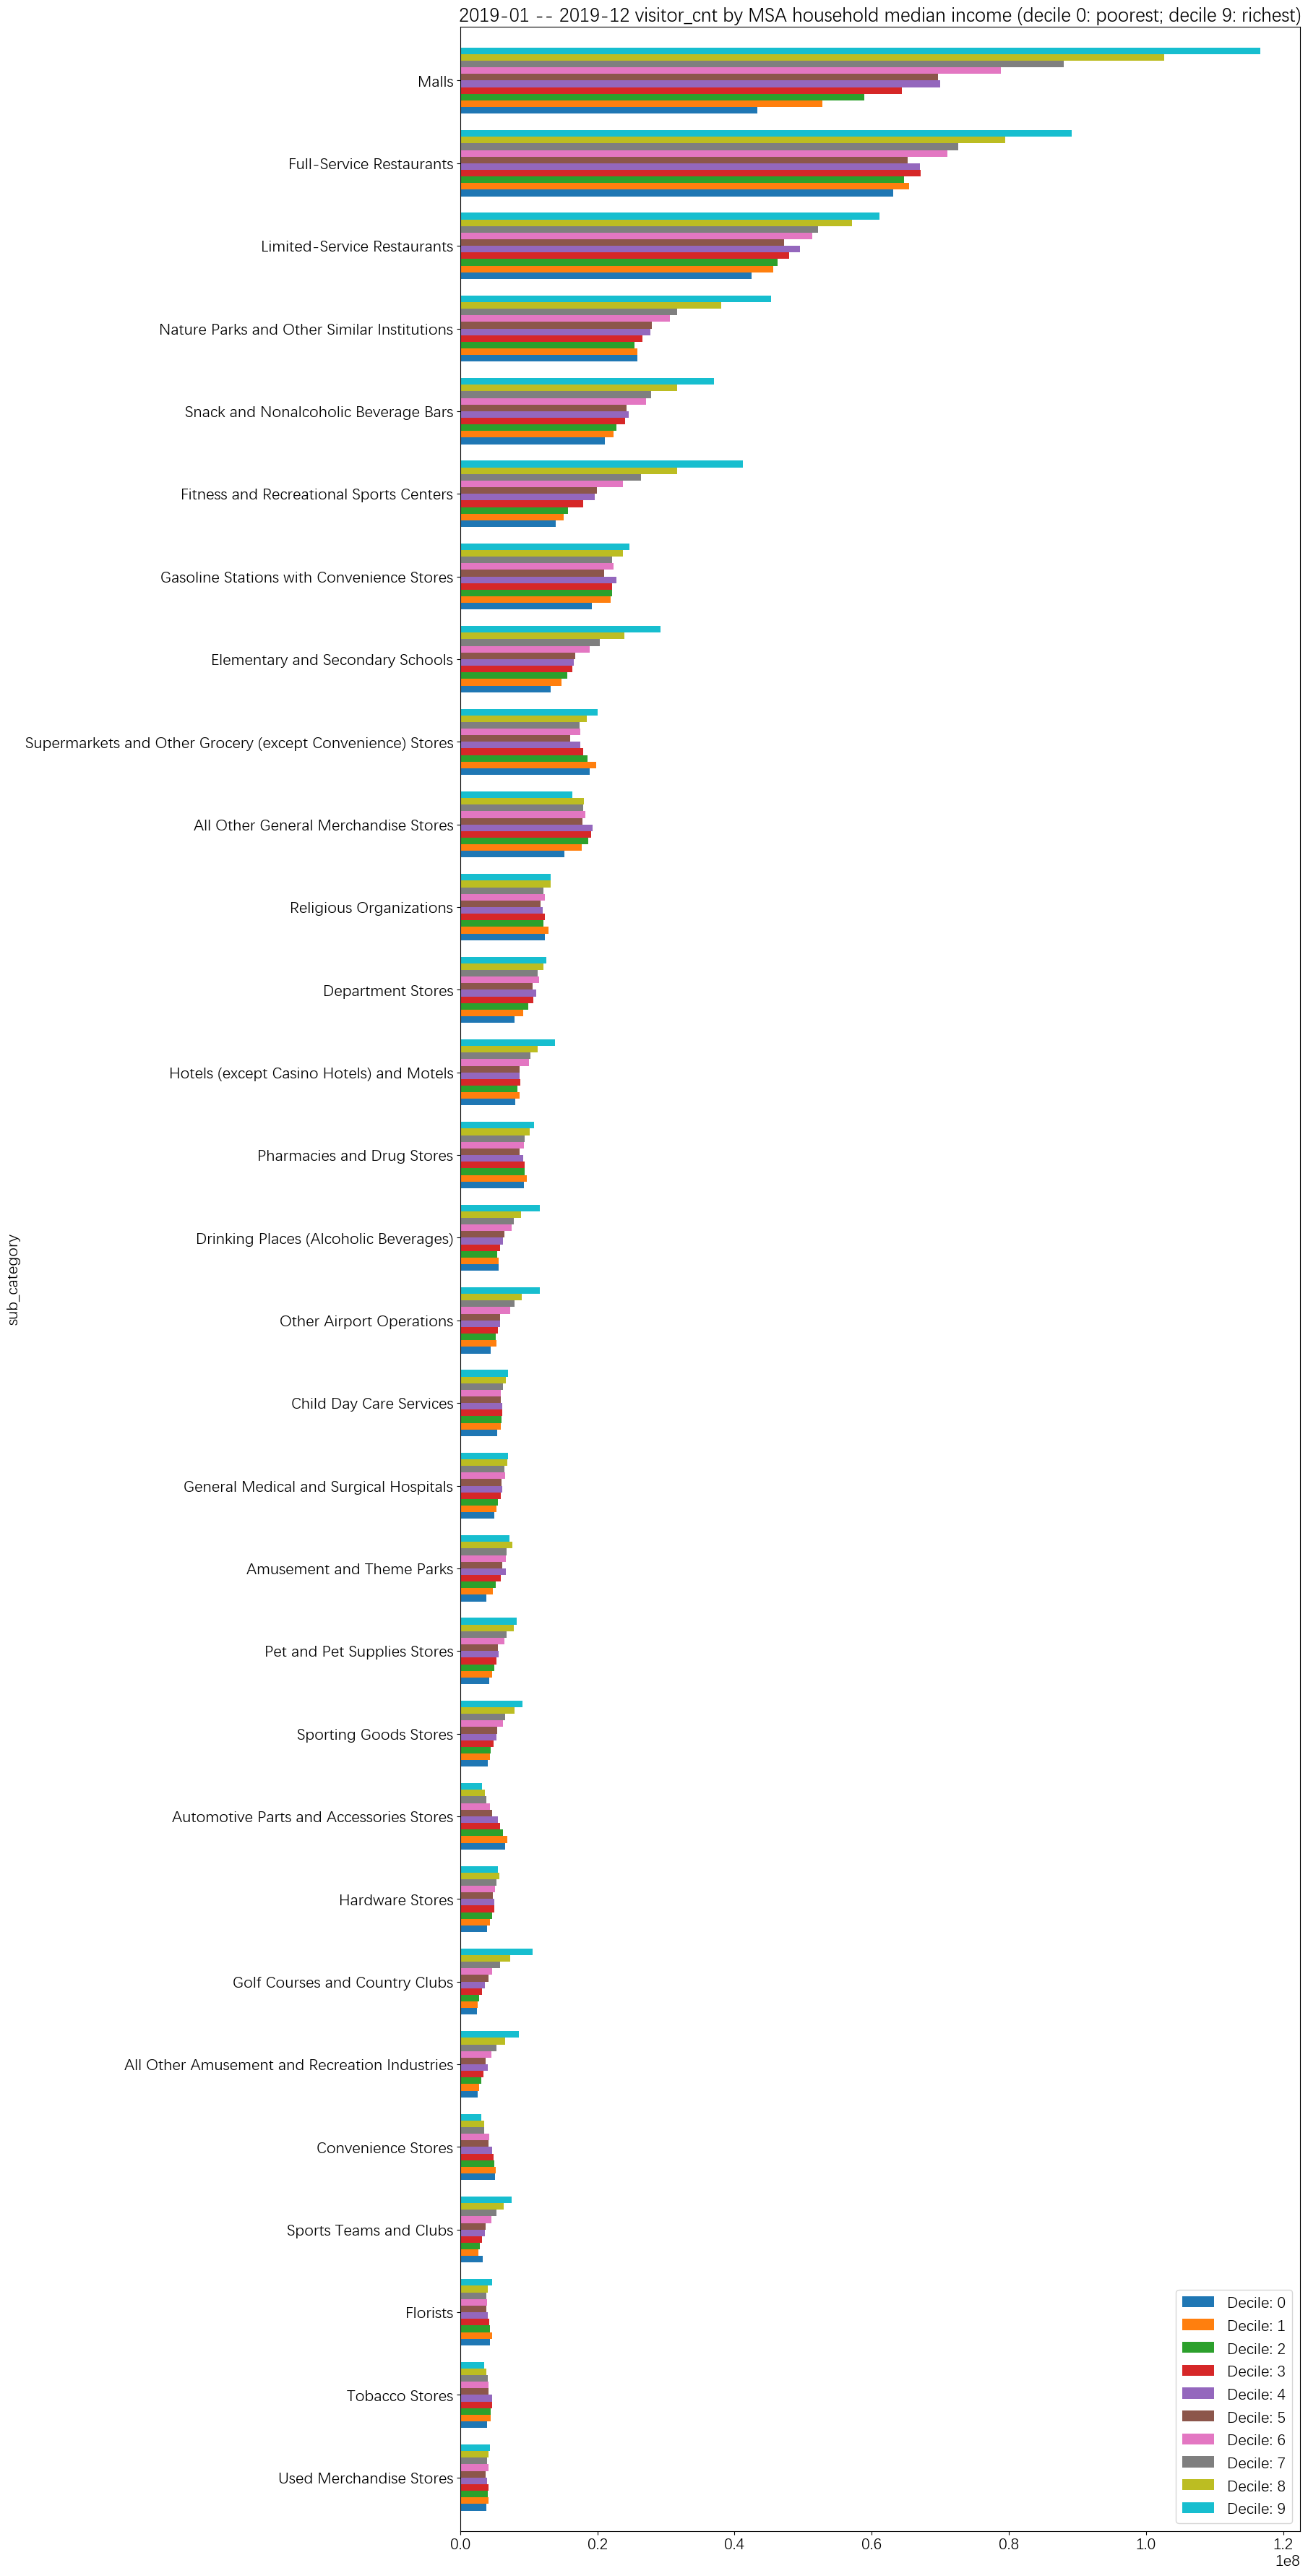

In [1050]:
deciles = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

print("MSA:", MSA_names)

target_df = county_POI_time_ACS_MSA_df[county_POI_time_ACS_MSA_df['median_household_income_decile'].isin(deciles)].set_index(f'{POI_level}_category').fillna(0)
target_df_gb = target_df.groupby('median_household_income_decile')

df_list = []
for decile, df in target_df_gb:
    decile_column = f'Decile: {decile:0.0f}'
    # df[decile_column] = df['total_visit_cnt']
    df[decile_column] = df[metric] 
   
    df_list.append(df[[decile_column]])
    
target_df = pd.concat(df_list, axis=1 )
fig, ax = plt.subplots(figsize=(15, 1.5 * len(top_k_category)))
ax.set_title(f'{start_time} -- {end_time} {metric} by MSA household median income (decile 0: poorest; decile 9: richest)')
ax = target_df.loc[top_k_category].plot.barh(ax = ax, width=0.8)
plt.savefig(f'{"+".join(MSA_names)}_{metric}_{start_time}-{end_time}.png', dpi=254)
plt.show()

smartphone per capita? 